In this example, ﻿Z﻿ = the likelihood of a biking accident, ﻿Y﻿ = speed, and ﻿X﻿ = trail difficulty. We assume that ﻿X﻿ decreases ﻿Y﻿ causally because people decrease their speed on difficult trails. In addition, ﻿Y﻿ and ﻿X﻿ both increase ﻿Z﻿ causally because fast biking on difficult trails leads to accidents. Difficulty will be on a scale from 0 to 1, speed in miles per hour, and likelihood of an accident also on a scale from 0 to 1. (Based on the numbers, I'd say these trails are quite challenging!)

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

In [2]:
num = 100 

difficulty = np.random.uniform(0, 1, (num,)) 

speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0) 

accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1) 

df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident}) 

In [3]:
df.head()

,difficulty,speed,accident
0,0.040019,10.600141,0.701745
1,0.524136,4.881662,0.316217
2,0.069982,23.879990,0.052683
3,0.663491,13.106454,0.491369
4,0.813950,6.472137,0.386024


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   difficulty  100 non-null    float64
 1   speed       100 non-null    float64
 2   accident    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


,difficulty,speed,accident
count,100.000000,100.000000,100.000000
mean,0.472479,9.901936,0.481557
std,0.288044,6.265500,0.315210
min,0.009795,0.000000,0.000000
25%,0.233037,4.967372,0.245038
50%,0.464948,9.232478,0.471150
75%,0.738643,13.993770,0.709460
max,0.987732,28.205354,1.000000


In [103]:
# Run linear regression on bootstrap samples of the data
def bootstrap_sample(df, n_samples=1000):
    # Ensure the column names match your dataset
    if 'difficulty' not in df.columns or 'speed' not in df.columns:
        raise ValueError("DataFrame must contain 'difficulty' and 'speed' columns.")
    
    results = []  # Collect results in a list for efficiency
    for i in range(n_samples):
        sample = df.sample(n=50, replace=False)
        X = sm.add_constant(sample['difficulty'])
        y = sample['speed']
        model = sm.OLS(y, X).fit()
        
        # Append the index and difficulty coefficient to the results list
        results.append({'index': i, 'difficulty': model.params['difficulty']})
    
    # Convert results to a DataFrame
    diff_coef = pd.DataFrame(results)
    return diff_coef

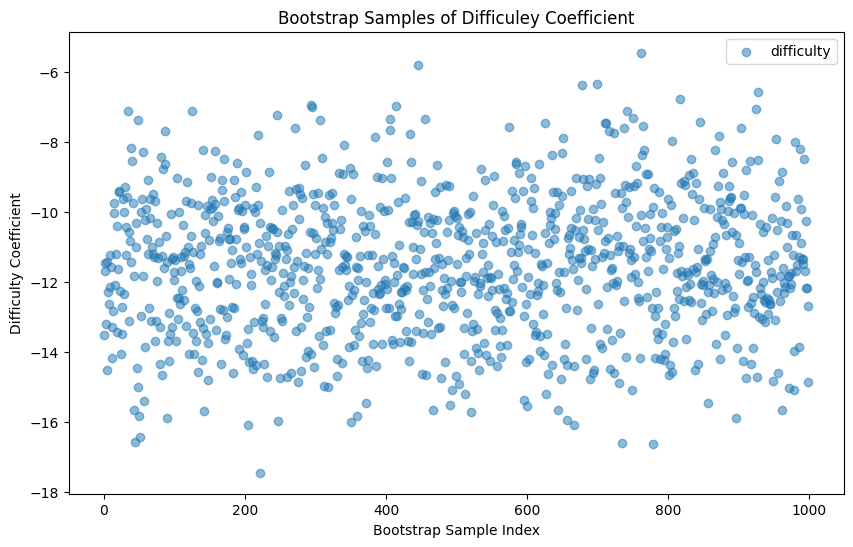

In [104]:
diff_coef = bootstrap_sample(df, n_samples=1000)

# Plot the results of the bootstrap
plt.figure(figsize=(10,6))
plt.scatter(data=diff_coef, x='index', y='difficulty', alpha=.5)
plt.title('Bootstrap Samples of Difficuley Coefficient')
plt.xlabel("Bootstrap Sample Index")
plt.ylabel("Difficulty Coefficient")
plt.legend()
plt.show()

In [105]:
diff_coef.mean()

index         499.500000
difficulty    -11.533432
dtype: float64

In [106]:
# Run linear regression on bootstrap samples of the data
def bootstrap_sample_2(df, n_samples=1000):
    # Ensure the column names match your dataset
    if 'difficulty' not in df.columns or 'speed' not in df.columns or 'accident' not in df.columns:
        raise ValueError("DataFrame must contain 'difficulty', 'speed', and 'accident' columns.")
    
    results = []  # Collect results in a list for efficiency
    for i in range(n_samples):
        sample = df.sample(n=50, replace=False)
        X = sm.add_constant(sample[['difficulty','accident']])
        y = sample['speed']
        model = sm.OLS(y, X).fit()
        
        # Append the index and difficulty coefficient to the results list
        results.append({'index': i, 'difficulty': model.params['difficulty']})
    
    return diff_coef

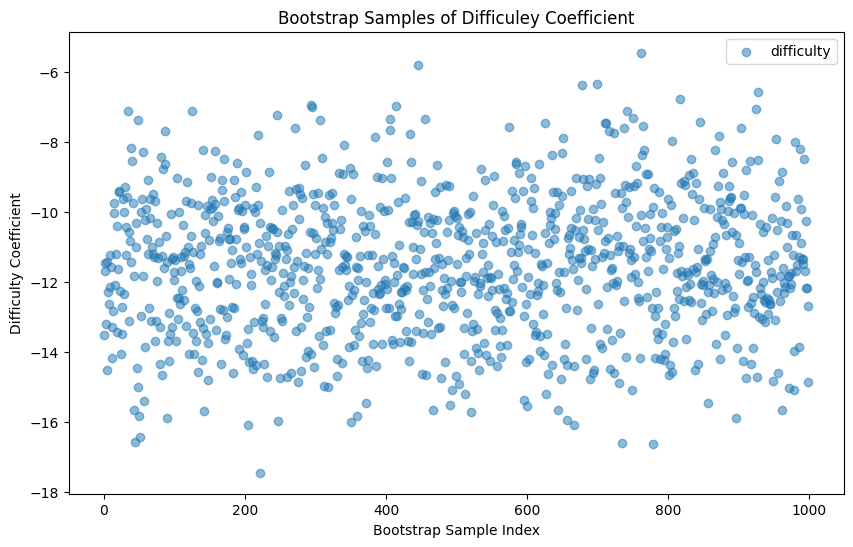

In [107]:
# Find the average difficulty using the new bootstrap function
diff_coef_2 = bootstrap_sample_2(df, n_samples=1000)

# Plot the results of the bootstrap
plt.figure(figsize=(10,6))
plt.scatter(data=diff_coef_2, x='index', y='difficulty', alpha=.5)
plt.title('Bootstrap Samples of Difficuley Coefficient')
plt.xlabel("Bootstrap Sample Index")
plt.ylabel("Difficulty Coefficient")
plt.legend()
plt.show()

In [108]:
diff_coef_2['difficulty'].mean()

np.float64(-11.533431886417073)

In [ ]:
# Define X and y
X = sm.add_constant(df['difficulty','accident'])  # Add constant for intercept
y = df['speed']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())